## HW1 Problem Set

### problem 2

Polynomial Regression. Let us fit data points via the polynomial regression with the degree n. the data files of hw1x.dat and hw1y.dat contains the inputs (x^(i)) and outputs (y^(i)) for a regression problem with one training example per row. Find the weights parameters using the least-square approach learned at the class

(a) In case of n=1, we call it the linear regression problem of y=θ. Find the weight parameter θ(consisting of the coefficient θ1 of the intercept θ0, i.e. θ1x + θ0), and plot the data points together with the linear regression line.

In [1]:
import numpy as np

x = np.loadtxt('sample/hw1x.dat')
y = np.loadtxt('sample/hw1y.dat')

In [10]:
A = np.vstack([x, np.ones(len(x))]).T

In [11]:
pseudo_inverse = np.linalg.pinv(A)

In [12]:
coefficients = np.dot(pseudo_inverse, y)

In [13]:
a, b = coefficients
y_pred = a * x + b

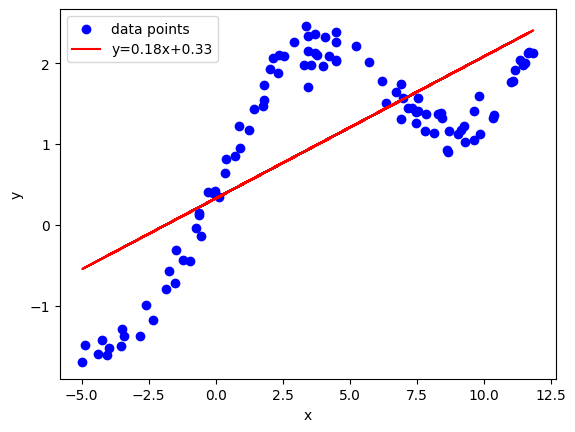

In [14]:
import matplotlib.pyplot as plt

plt.scatter(x, y, color="blue", label="data points")   
plt.plot(x, y_pred, color="red", label=f"y={a:.2f}x+{b:.2f}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

(b) Try to increase n up to where you observe the overfit problem. Please plot each case together with data points. Please discuss what is happening when you start with n=1 and increase a bit, and up to the selected large value with the overfit problem

In [17]:
degrees = [1, 2, 3, 4, 5, 8, 10, 15]

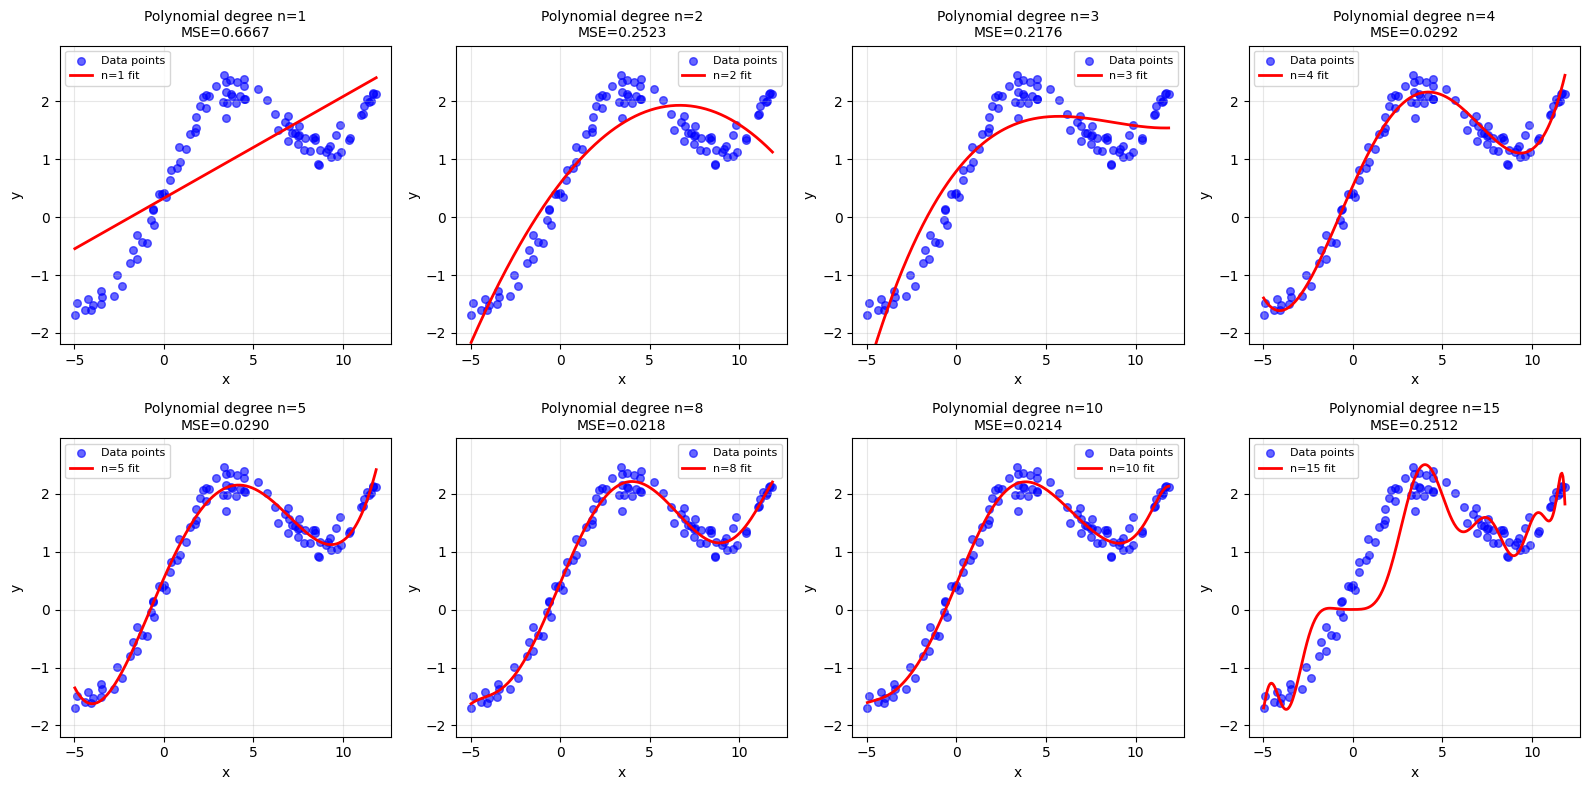

In [20]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for idx, n in enumerate(degrees):
    A = np.vstack([x**i for i in range(n+1)]).T
    
    # Pseudo-inverse를 이용한 계수 계산
    pseudo_inverse = np.linalg.pinv(A)
    coefficients = np.dot(pseudo_inverse, y)
    
    x_smooth = np.linspace(x.min(), x.max(), 300)
    A_smooth = np.vstack([x_smooth**i for i in range(n+1)]).T
    y_pred = np.dot(A_smooth, coefficients)
    
    # 훈련 데이터에 대한 예측
    y_train_pred = np.dot(A, coefficients)
    
    # MSE 계산
    mse = np.mean((y - y_train_pred)**2)
    
    axes[idx].scatter(x, y, color='blue', s=30, alpha=0.6, label='Data points')
    axes[idx].plot(x_smooth, y_pred, color='red', linewidth=2, label=f'n={n} fit')
    axes[idx].set_title(f'Polynomial degree n={n}\nMSE={mse:.4f}', fontsize=10)
    axes[idx].set_xlabel('x')
    axes[idx].set_ylabel('y')
    axes[idx].legend(fontsize=8)
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_ylim([y.min()-0.5, y.max()+0.5])

plt.tight_layout()
plt.show()

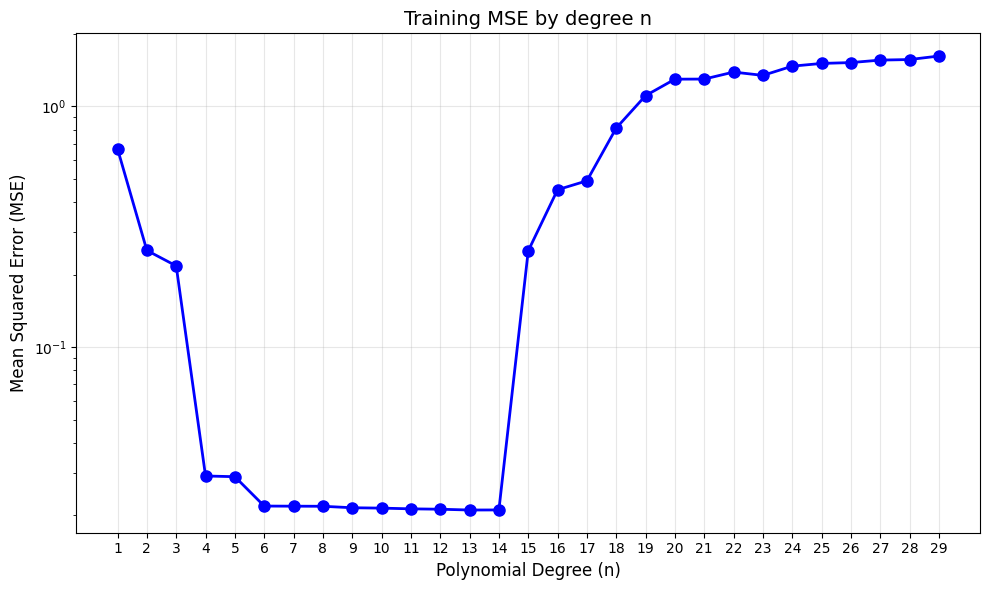

In [30]:
mse_values = []

for n in degrees:
    A = np.vstack([x**i for i in range(n+1)]).T
    pseudo_inverse = np.linalg.pinv(A)
    coefficients = np.dot(pseudo_inverse, y)
    y_pred = np.dot(A, coefficients)
    mse = np.mean((y - y_pred)**2)
    mse_values.append(mse)

# MSE plot
plt.figure(figsize=(10, 6))
plt.plot(degrees, mse_values, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Polynomial Degree (n)', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.title('Training MSE by degree n', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(degrees)
plt.yscale('log')
plt.tight_layout()
plt.show()

위 그래프에서 n = 15부터 overfit함을 확인할 수 있다.

### problem 3

Ridge Regression. In this problem, we will investigate how the Ridge Regression improves some limitations in the polynomial regression. We will use the same files used in Q2. 

(a) In the class, we learned a closed form of the solution via least-square. Use the least square solution and apply various the alpha value -> and show how introducing the regularization can avoid the overfit problem as you observed in Q2(b). Discuss your results.

In [32]:
#ref: https://sanghyu.tistory.com/13

def ridge_regression(X, y, alpha):
    """
    Ridge Regression closed form solution
    coefficients = (X^T X + alpha*I)^(-1) X^T y
    """
    n_features = X.shape[1]
    I = np.eye(n_features)
    coefficients = np.linalg.inv(X.T @ X + alpha * I) @ X.T @ y
    return coefficients

In [34]:
alphas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
n_overfit = 15

In [35]:
A = np.vstack([x**i for i in range(n_overfit+1)]).T

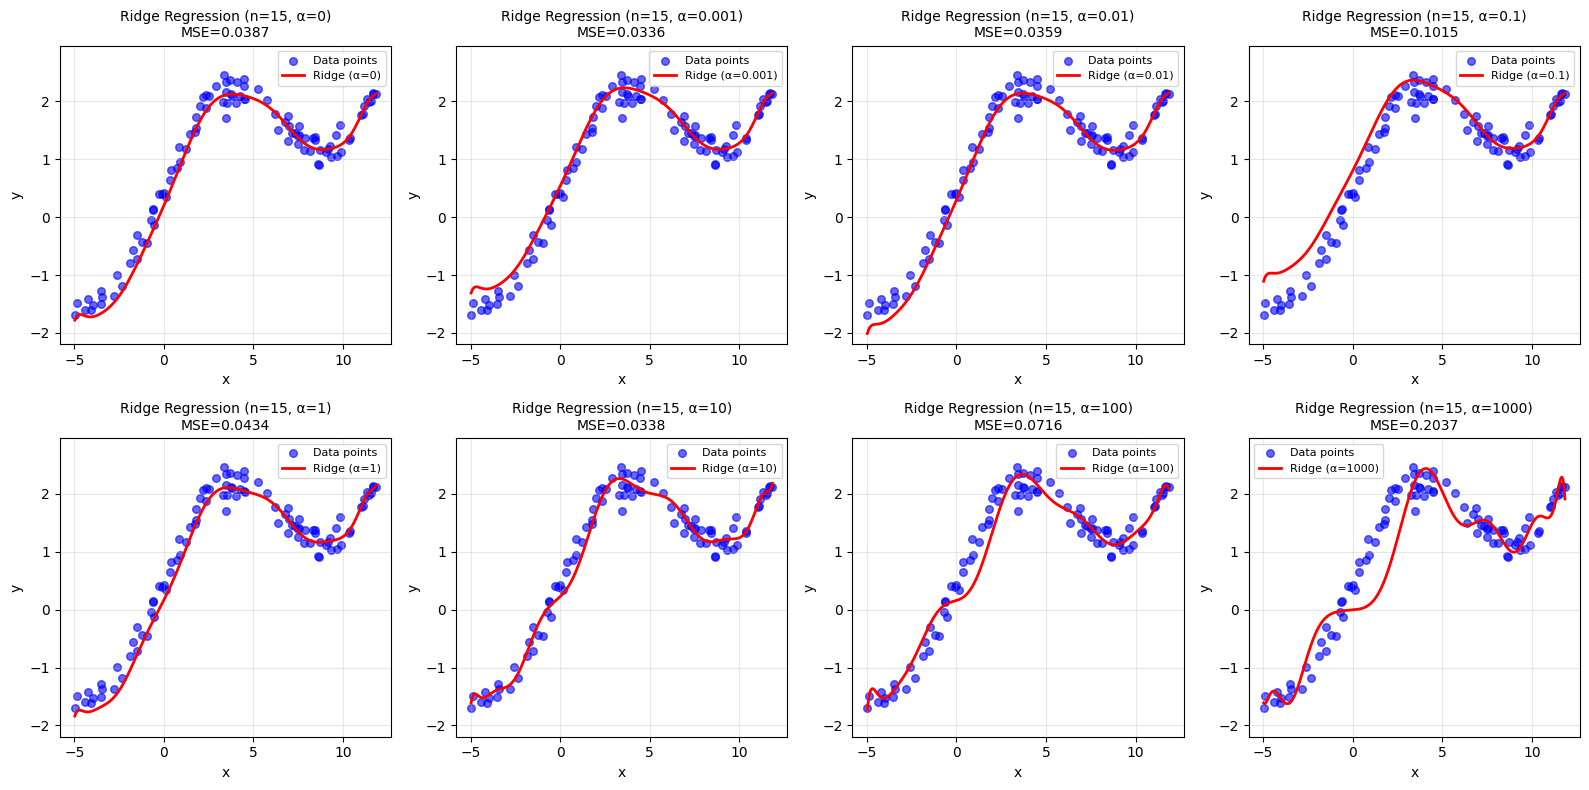

In [36]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

mse_ridge = []

for idx, alpha in enumerate(alphas):
    coefficients = ridge_regression(A, y, alpha)
    
    x_smooth = np.linspace(x.min(), x.max(), 300)
    A_smooth = np.vstack([x_smooth**i for i in range(n_overfit+1)]).T
    y_pred_smooth = np.dot(A_smooth, coefficients)
    
    y_train_pred = np.dot(A, coefficients)
    mse = np.mean((y - y_train_pred)**2)
    mse_ridge.append(mse)
    
    axes[idx].scatter(x, y, color='blue', s=30, alpha=0.6, label='Data points')
    axes[idx].plot(x_smooth, y_pred_smooth, color='red', linewidth=2, 
                   label=f'Ridge (α={alpha})')
    axes[idx].set_title(f'Ridge Regression (n={n_overfit}, α={alpha})\nMSE={mse:.4f}', 
                        fontsize=10)
    axes[idx].set_xlabel('x')
    axes[idx].set_ylabel('y')
    axes[idx].legend(fontsize=8)
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_ylim([y.min()-0.5, y.max()+0.5])

plt.tight_layout()
plt.show()

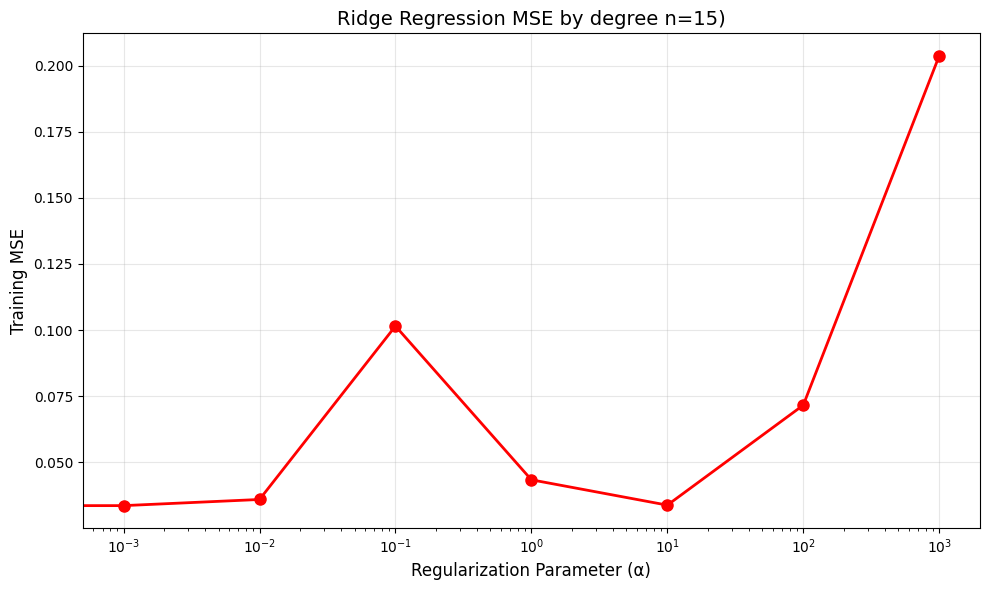

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_ridge, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Regularization Parameter (α)', fontsize=12)
plt.ylabel('Training MSE', fontsize=12)
plt.title(f'Ridge Regression MSE by degree n={n_overfit})', fontsize=14)
plt.xscale('log')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

위 Q2에서 overfit이 발생하기 시작한 n=15에 대해서 ridge regression을 적용하였다. alpha를 0애서 1000꺼지 변화시키며 실험한 결과 alpha=0 인 경우에는 q2과 동일하게 overfitting 문제가 발생했으며 alpha 값을 증가시키면 MSE가 감소하며 그래프 상에서도 모델이 부드러워지는 것을 확인할 수 있었다. 특히 alpha 0.001~0.01 범위에서는 traing mse가 유지되면서도 그래프상으로 oscillation이 감소함을 확인할 수 있었다. <br/> alpah = 100이상에서는 mse 값이 증가하며 underfitting 문제가 발생했다. <br/> 따라서 alpha = 0.001이 n=15에 가장 적합한 규제일 것으로 보인다.

(b) Additionally, in this problem, you will use scikit-learn library to implement the
Ridge Regression as follows:
from sklearn.linear_model import Ridge
Please repeat (a).

In [48]:
from sklearn.linear_model import Ridge

alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
n_overfit = 15

A = np.vstack([x**i for i in range(n_overfit+1)]).T

In [50]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore")

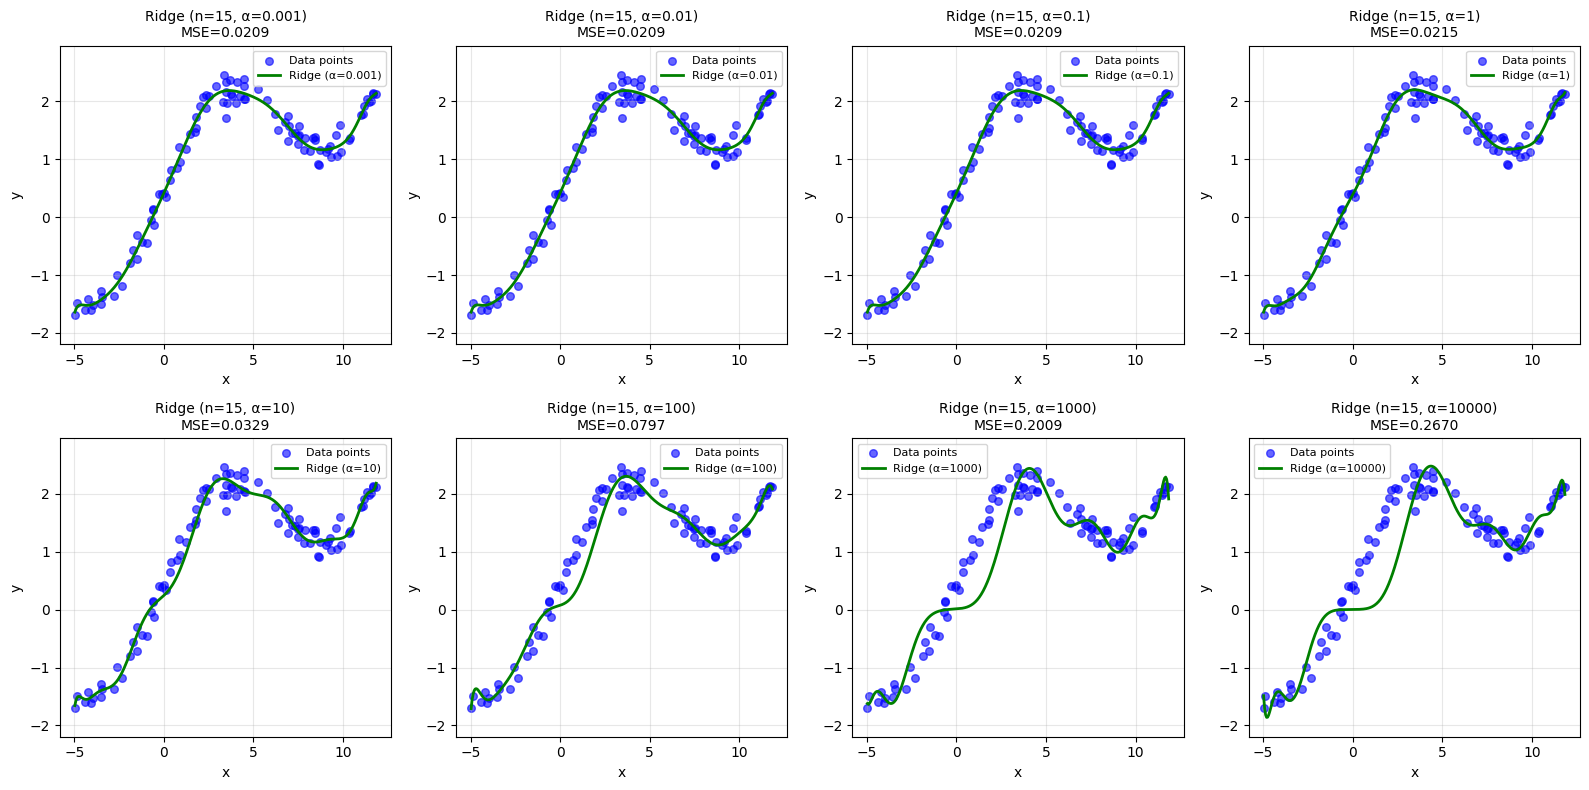

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

mse_sklearn = []

for idx, alpha in enumerate(alphas):
    ridge_model = Ridge(alpha=alpha, fit_intercept=False)
    ridge_model.fit(A, y)
    
    x_smooth = np.linspace(x.min(), x.max(), 300)
    A_smooth = np.vstack([x_smooth**i for i in range(n_overfit+1)]).T
    y_pred_smooth = ridge_model.predict(A_smooth)
    
    y_train_pred = ridge_model.predict(A)
    mse = np.mean((y - y_train_pred)**2)
    mse_sklearn.append(mse)
    
    axes[idx].scatter(x, y, color='blue', s=30, alpha=0.6, label='Data points')
    axes[idx].plot(x_smooth, y_pred_smooth, color='green', linewidth=2, 
                   label=f'Ridge (α={alpha})')
    axes[idx].set_title(f'Ridge (n={n_overfit}, α={alpha})\nMSE={mse:.4f}', 
                        fontsize=10)
    axes[idx].set_xlabel('x')
    axes[idx].set_ylabel('y')
    axes[idx].legend(fontsize=8)
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_ylim([y.min()-0.5, y.max()+0.5])

plt.tight_layout()
plt.show()

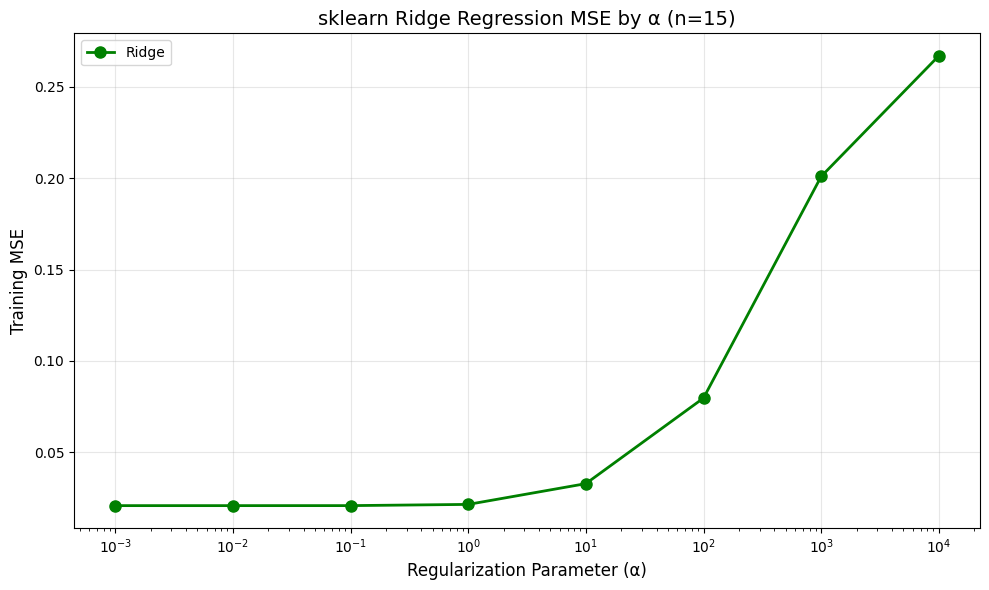

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_sklearn, 'go-', linewidth=2, markersize=8, label='Ridge')
plt.xlabel('Regularization Parameter (α)', fontsize=12)
plt.ylabel('Training MSE', fontsize=12)
plt.title(f'sklearn Ridge Regression MSE by α (n={n_overfit})', fontsize=14)
plt.xscale('log')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

sklearn Ridge를 사용한 결과, α=0.001 범위에서 MSE 0.021로 좋은 성능을 보였으며 α가 overfitting이 완화됐다. 앞 q3(a)와 비교 시 MSE 차이(0.008~0.022)가 발생했는데 <br/> 찾아본 결과 차이는 sklearn이 feature scaling을 적용한것의 차이에서 오는 걸로 확인된다. 고차 다항식의 경우 scaling도 결과에 중요한 영향을 미침을 확인할 수 있다.